# Методы восстановления регрессии

Задачу обучения по прецедентам при $Y=\mathbb{R}$ принято называть задачей восстановления регрессии. Задано пространство объектов X и множество возможных ответов Y. Существует неизвестная целевая зависимость $y^*:X\rightarrow Y$ , значения которой известны только на объектах обучающей выборки $X^\ell = (x_i, y_i)_{i-1}^\ell, y_i = y^* (x_i)$. Требуется построить алгоритм, который в данной задаче принято называть "функцией регрессии" $a: X^* \rightarrow Y$ , аппроксимирующий целевую зависимость $y^*$.

 ## Линейная регрессия
 
 Будем работать на примере датасета  основанным  на ценах жилья в Бостоне.
Для начала импортируем нужные для работы библиотеки.
Сравнивать score будем используя mean_squared_error из sklearn.

In [252]:
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
boston_dataset = load_boston()



Для визуализации решим задачу регрессии исопльзуя один признак  датасета:
Решение нормальной системы

Линейной моделью регресси называется уравнение вида – $\phi(x, \alpha)=\sum_{i=1}^n \alpha_j \cdot f_j(x)$. $F$ – матрица признаков. Задача – вычилить параметры алгоритма ($\alpha$).

$\alpha^* = (F^TF)^{-1}F^Ty = F^+y$

Матрица $F^+$ называется *псевдообратной*. Решив это уравнение, получим параметры алгоритма.

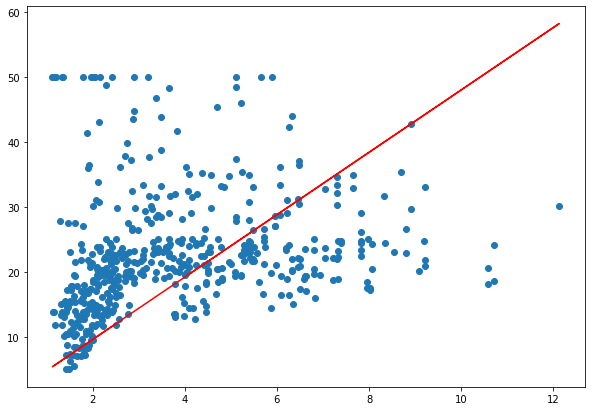

158.63600738149242


In [346]:
X, y = boston_dataset['data'], boston_dataset['target']
X = X[:,7]
X = X.reshape((len(X), 1))
y = y.reshape((len(y), 1))


w = inv(X.T.dot(X)).dot(X.T).dot(y)
yhat = X.dot(w)


pyplot.scatter(X, y)
pyplot.plot(X,yhat,c='red')
pyplot.show()
print(mean_squared_error(y,yhat))

In [367]:
X, y = boston_dataset['data'], boston_dataset['target']
w = inv(X.T.dot(X)).dot(X.T).dot(y)
yhat = X.dot(w)
main_score = mean_squared_error(y,yhat)
print(f"Вектор параметров: {w}")
print(f"Функционал качества = {main_score}")

Вектор параметров: [-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]
Функционал качества = 24.166099330126492


### Как мы видим имеем неплохой score. 

Попробуем применить L1 и L2 регуляризацию к линейной регресии и посмотрим на результат.

Где для гребневной регресии добавляется слагаемое как штраф
 
 $\alpha^* = (F^TF +\lambda I)^{-1}F^Ty = F^+y$

А для lasso для каждого элемента из a* нужно иттерационно выполнять регуляризацию такого вида: 
$ a*(\lambda) = sign(a_j)(|a_j|-\frac{1}{2}*\lambda)_+$

где $f(x)  = (x)_+ = max(x,0)$

за параметра штрафа lambda выберем рекомендованное значение 0.4

In [392]:
def sign(condition):
    return condition if condition > 0 else 0

lmbd = 0.4


X, y = boston_dataset['data'], boston_dataset['target']
w1 = inv(X.T.dot(X)+lmbd*np.eye(X.shape[1])).dot(X.T).dot(y)
w2 = inv(X.T.dot(X)).dot(X.T).dot(y)
yhat = X.dot(w1)
score1 = mean_squared_error(y,yhat) 
current = 10**8
w_graph = []
for _ in range(20):
    new_w2 =[]
    for i in w2:
        i = sign((np.sign(i))*(i-(1/2)*lmbd))
        new_w2.append(i)
    yhat = X.dot(new_w2)
    if mean_squared_error(y,yhat) > current:
        break
    current = mean_squared_error(y,yhat) 
    w2 = new_w2
    w_graph.append(new_w2)
    yhat = X.dot(w2)
    score2 = current





print(f"Вектор параметров без регуляризации:\n {w}\n")
print(f"Вектор параметров с Ridge:\n {w1}\n")
print(f"Вектор параметров с Lasso>: \n{w2}\n")

Вектор параметров без регуляризации:
 [-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]

Вектор параметров с Ridge:
 [-0.09279587  0.04886228 -0.00642271  2.81223543 -2.37790386  5.899925
 -0.00761125 -0.96418052  0.17146392 -0.00949698 -0.3911286   0.01488668
 -0.41905197]

Вектор параметров с Lasso>: 
[0, 0, 0, 0.45399881999396324, 0.8684363704140385, 3.5281477790530076, 0, 0, 0, 0, 0, 0, 0]



#### Как мы могли заметить, Ridge помог нам значительно уменьшить значения вектора параметров, что может помогать бороться с шумом.

#### При этом Lasso сделал тоже самое, при этом отобросил наименее полезные признаки.

In [393]:
print(f"Score до регуляризации:\n {main_score}\n")
print(f"Score после Ridge:\n {score1}\n")
print(f"Score после Lasso>: \n{score2}\n")

  

Score до регуляризации:
 24.166099330126492

Score после Ridge:
 24.167248557457345

Score после Lasso>: 
59.277170062087244



#### Как можно заметить зануление признаков Lasso  может негативно сказаться на score, однако мы использовали не все, а только наиболее важные признаки.

#### Отрисуем график отбора признаков

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text yticklabel objects>)

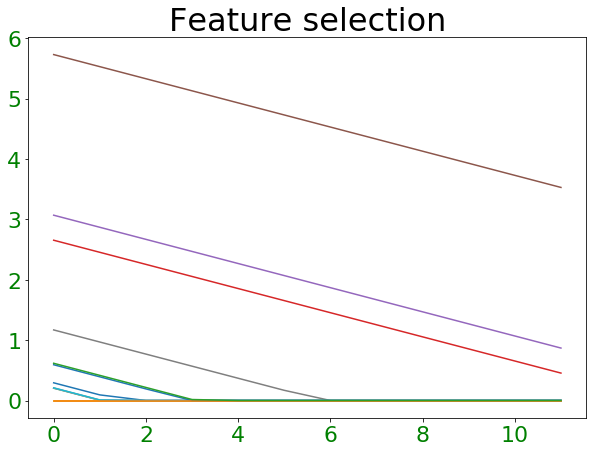

In [394]:
pyplot.rcParams["figure.figsize"] = [10,7]
df = pd.DataFrame(w_graph)
pyplot.plot(range(len(w_graph)),df)
pyplot.title('Feature selection', fontsize = 32)
pyplot.xticks(fontsize=22,c='green')
pyplot.yticks(fontsize=22,c='green')






### Решение через SVD

Принцип *SVD* заключается в том, чтобы разложить $F$ на 3 матрицы:

$F = VDU^T$

$D$ – диагональная матрица собственных значений $F^TF$

$V$ – ортогональная матрица $l \times n$

$U$ – ортогональная матрица $n \times n$

Проделав сингулярное разбиение, можно вычислить параметры алгоритма:

$a^* = F^+y = UD^{-1}V^Ty$

In [397]:
V, D, U = np.linalg.svd(X, full_matrices=False)
U = np.transpose(U)
D = np.diag(D)
pseudo_inverse = np.dot(np.dot(U, np.linalg.inv(D)), np.transpose(V))
w = np.dot(pseudo_inverse, y)
yhat = np.dot(X, w) 
print(f"Score с SVD = {mean_squared_error(y,yhat)}")

Score с SVD = 24.166099330126492


## В итоге, оба метода отличаются лишь способом разрешения матричного уравнения, но оба способа не отличаются друг от друга по результативности.